In [21]:
import numpy as np
import gym
import d4rl

# Load the dataset
env_name = "hopper-medium-replay-v2"

env= gym.make(env_name)  # Example environment
dataset = env.get_dataset()

rewards = dataset['rewards']
timeouts = dataset['timeouts']
terminal_rewards = []

# Calculate rewards per trajectory
trajectory_reward = 0
for reward, timeout in zip(rewards, timeouts):
    trajectory_reward += reward
    if timeout:
        terminal_rewards.append(trajectory_reward)
        trajectory_reward = 0

# Handle the last trajectory if it doesn't end with a timeout
if not timeouts[-1]:
    terminal_rewards.append(trajectory_reward)




load datafile: 100%|████████████████████████████| 11/11 [00:00<00:00, 24.64it/s]


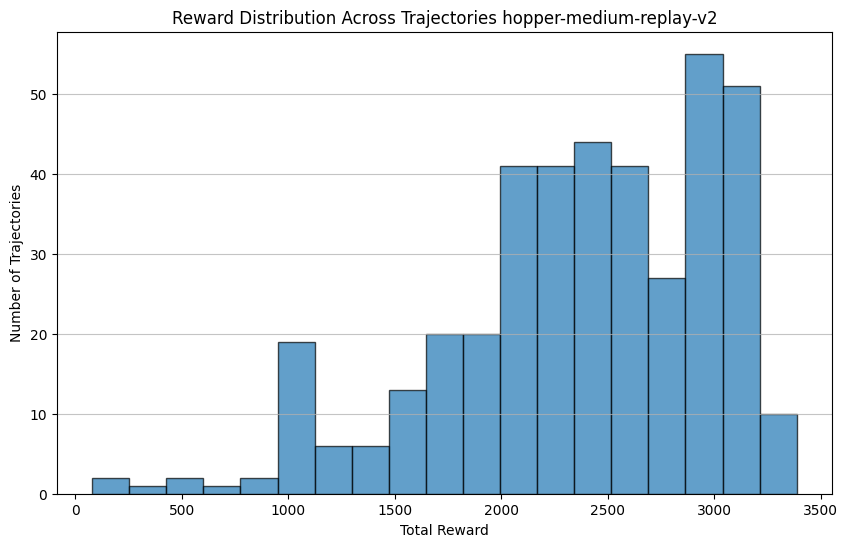

In [22]:
import matplotlib.pyplot as plt

# Determine bin edges for histogram
min_reward = min(terminal_rewards)
max_reward = max(terminal_rewards)
bins = np.linspace(min_reward, max_reward, num=20)  # Adjust the number of bins as needed

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(terminal_rewards, bins=bins, alpha=0.7, edgecolor='black')

title = f"Reward Distribution Across Trajectories {env_name}"
plt.title(title)
plt.xlabel('Total Reward')
plt.ylabel('Number of Trajectories')
plt.grid(axis='y', alpha=0.75)

plt.show()
